**DATASET 1**

**Fuente:** Facturación de órdenes de trabajo para actividades de mantenimiento de una flota vehícular que cuenta con 16 tipos de activos diferentes, que a su vez están distribuidos en 20 tipos de operaciones diferentes. Los datos corresponden a operaciones reales efectuadas sobre un total de 124 activos aproximadamente.

**Objetivo - modelo de clasificación:** Para cada orden de trabajo se espera poder predecir el tipo de sistema que fue intevenido por la actividad de mantenimiento dentro de una lista de 23 posibles categorías. Un sistema es una agrupación funcional de un activo vehícular, por ejemplo el sistema de motor, el sistema de frenos, el sistema de sustensión, etc. 

**Datos hoja costos_unificados:**

1. *Contrato*: Corresponde al contrato suscrito entre la entidad y el prestador del servicio de mantenimiento, en un 13% de los casos un mismo contrato puede atender uno o máximo 2 sistemas, otro 19% de los contratos corresponden a actividades generales, no están asociados a un sistema puntual, el restante de contratos atiende un único sistema.

2. *Fecha generación*: Es la fecha cuando se generá la orden de trabajo.

3. *Fecha terminación actualizada*: Es la fecha de finalización real de la actividad de mantenimiento por parte del contratista.

4. *Fecha entrega*: Es la fecha de entrega de documentación para facturación.

5. *Número orden de trabajo*: Orden de trabajo, código para la facturación, que puede ser o no compartida por varios sistemas y varios contratistas.

6. *Número Activo ajustado*: Lista de activos operativos en el área de mantenimiento al momento del análisis, un mismo activo puede tener mínimo un código y máximo 3, si está dividido por secciones.

7. *Número Activo Original*: Es la lista de activos operativos e históricos con su código validado,  un mismo activo puede tener mínimo un código y máximo 3, si está dividido por secciones. Si no hay activo es por que el gasto corresponde a un gasto genérico para el área de mantenimiento en general.

8. *Estado*: Es el estado del proceso de facturación, es este caso los estados estimados, es decir, no se conoce su valor real a factura, ni se tiene plena certeza del total de sistemas a intervenir; por tanto, serán retirados del modelo para realizar una predicción posterior del tipo de sistema probable de acuerdo al estimado de la reparación.

9. *Valor factura*: Es el valor total facturado por el contratista para la orden de trabajo, el valor puede estar vacio dado que no fue reportado o por error de digitación o no se facturó la actividad.

10. ***Sistema***: Es la columna objetivo del estudio y se trata de identificar a cuál sistema corresponde una orden de trabajo, al día de hoy el sistema de facturación no tiene la opción de asociar este campo y es necesario identificar la inversión en cada sistema de los activos para identificar patrones de falla, gastos y estimar valores de contratos futuros. 

**Datos de la hoja datos_activos**:
Esta hoja contiene especificaciones de algunos de los activos históricos y vigentes.

1. *Número de activo*: Coincide con las columnas que refieran a número de activo.

2. *Tipo*: Es es tipo de activo, por ejemplo un carrotanque, una volqueta, un vehículo de carga pesada, etc., se tienen un total de 16 tipos de activos diferentes.

3. *Tipo de operación*: Es un indicativo del tipo de labor general del activo, por ejemplo, hidrolavado, barrido, recolección de escombros, etc., se tiene un total de 20 operaciones distintas.

4. *Marca chasis*: Es la marca del chasis de fabricación de los activos, hay un total de 15 marcas diferentes, para el total de 124 activos, así que varios de ellos las comparten.

5. *Modelo chasis*: Es una descripción más detallada de una referencia específica de chasis, hay un total de 25 modelos de chasis diferentes.

6. *Año fabricación del chasis*: Es el año de fabricación del componente estructural principal del activo y da cuenta de la edad del activo.

##**Carga del conjunto de datos y su exploración**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**DATA DE LA HOJA costos_unificados**

In [2]:
dataset1 = pd.read_excel(r'D:\Coding Dojo\DataScience\S7-Modelos_clasificacion\dataset_clasificacion_sistemas_estimacion_valor.xlsx', sheet_name='costos_unificados')
dataset1.head()

,Contrato,Fecha Generación,Terminación Actualizada,Fecha Entrega,Número orden de trabajo,Número Activo ajustado,Número Activo Original,Estado,Valor factura,Sistema
0,Contrato34,2018-07-28,2018-09-22,2018-10-25,O66103T2018,270.0,270,Facturado,1.793857e+06,Sistema4
1,Contrato34,2018-08-03,2018-08-03,2018-08-08,O66254T2018,377.0,377,Facturado,1.307067e+05,Sistema4
2,Contrato34,2018-08-03,2018-08-03,2018-08-14,O66255T2018,245.0,245,Facturado,1.693834e+06,Sistema4
3,Contrato34,2018-08-04,2018-08-04,2018-08-08,O66281T2018,236.0,236,Facturado,5.627988e+05,Sistema4
4,Contrato34,2018-08-04,2018-08-05,2018-08-14,O66293T2018,390.0,390,Facturado,3.690611e+05,Sistema4


In [3]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134746 entries, 0 to 134745
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Contrato                 133907 non-null  object        
 1   Fecha Generación         134119 non-null  datetime64[ns]
 2   Terminación Actualizada  134745 non-null  datetime64[ns]
 3   Fecha Entrega            23920 non-null   datetime64[ns]
 4   Número orden de trabajo  134746 non-null  object        
 5   Número Activo ajustado   79652 non-null   float64       
 6   Número Activo Original   134471 non-null  object        
 7   Estado                   134743 non-null  object        
 8   Valor factura            134746 non-null  float64       
 9   Sistema                  133381 non-null  object        
dtypes: datetime64[ns](3), float64(2), object(5)
memory usage: 10.3+ MB


In [4]:
#%De datos faltantes por cada columna
(dataset1.isna().sum()/len(dataset1))*100

Contrato                    0.622653
Fecha Generación            0.465320
Terminación Actualizada     0.000742
Fecha Entrega              82.248082
Número orden de trabajo     0.000000
Número Activo ajustado     40.887299
Número Activo Original      0.204088
Estado                      0.002226
Valor factura               0.000000
Sistema                     1.013017
dtype: float64

**DATA DE LA HOJA datos_activos**

In [5]:
dataset1_activos = pd.read_excel(r'D:\Coding Dojo\DataScience\S7-Modelos_clasificacion\dataset_clasificacion_sistemas_estimacion_valor.xlsx', sheet_name='datos_activos')
dataset1_activos.head()

,Número de Activo,TIPO,TIPO DE OPERACIÓN,MARCA CHASIS,MODELO CHASIS,AÑO FABRICACIÓN DEL CHASIS
0,102,TipoActivo7,Operacion8,MarcaChasis8,ModeloChasis25,2005
1,107,TipoActivo7,Operacion8,MarcaChasis8,ModeloChasis25,2005
2,108,TipoActivo7,Operacion8,MarcaChasis8,ModeloChasis25,2005
3,226,TipoActivo3,Operacion3,MarcaChasis3,ModeloChasis5,2007
4,228,TipoActivo3,Operacion3,MarcaChasis3,ModeloChasis5,2007


In [6]:
dataset1_activos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Número de Activo            227 non-null    int64 
 1   TIPO                        227 non-null    object
 2   TIPO DE OPERACIÓN           227 non-null    object
 3   MARCA CHASIS                227 non-null    object
 4   MODELO CHASIS               227 non-null    object
 5   AÑO FABRICACIÓN DEL CHASIS  227 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.8+ KB


##**RETOS**

1. La determinación de las columnas útiles para la predicción.

2. La transformación de los datos.

3. La combinación de las tablas de costos y la de características de los activos.

4. El tratamiento de los datos faltantes, que hay varios de ellos en algunas columnas.

5. Elección del mejor modelo y optimización del mismo.

6. Es un problema de clasificación multiclase.

##**ACTIVIDADES PARTE 2**

**TAREAS**

Para cumplir con los requisitos para esta semana, deben haber:

-eliminado las columnas innecesarias

-eliminado las filas duplicadas

-identificado y abordado los valores faltantes 

-identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

-producido visuales univariantes para el objetivo y todas las características

-identificado los valores atípicos

-producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

-comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron.

####**Acciones con columnas y ambos dataframe**

In [7]:
dataset1.describe(include='all')

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_16636\4023060253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset1.describe(include='all')
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_16636\4023060253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset1.describe(include='all')
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_16636\4023060253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt t

,Contrato,Fecha Generación,Terminación Actualizada,Fecha Entrega,Número orden de trabajo,Número Activo ajustado,Número Activo Original,Estado,Valor factura,Sistema
count,133907,134119,134745,23920,134746,79652.000000,134471.0,134743,1.347460e+05,133381
unique,55,1510,1509,728,27664,NaN,565.0,20,NaN,20
top,Contrato24,2018-06-26 00:00:00,2019-02-01 00:00:00,2019-09-17 00:00:00,O70767T2019,NaN,386.0,Facturado,NaN,Sistema21
freq,42558,4288,258,183,2889,NaN,1423.0,131263,NaN,80202
first,NaN,2017-02-21 00:00:00,2017-02-22 00:00:00,2017-07-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-12-24 00:00:00,2021-12-24 00:00:00,2021-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,346.826771,NaN,NaN,2.587624e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,276.998848,NaN,NaN,1.486400e+06,NaN
min,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,284.000000,NaN,NaN,1.850101e+04,NaN


**Acciones a realizar con columnas:**

1. Las columna de fecha de generación y terminación directamente no son necesarias por ahora, dado que no se va a predecir el tiempo medio entre fallas y no se va a validar si en algún momento en específico del año podría estar asociado al tipo de sistema que falla; por tanto, para el estudio inicial estas columnas serán reemplazadas por la diferencia entre ambas fechas, esto indica el tiempo de duración de la reparación, lo que sí podría estas asocida al sistema que se repara.

2. El número de orden de trabajo es un número único, que podría repetirse o no en diferentres contratistas, pero que es un ID para facturación único; por tanto, se puede eliminar, más aún que es un número consecutivo que no indica más que un número generado por un sistema de información para generar un orden contable.

3. La fecha de entrega, no es necesario, dado que hace referencia a un proceso administrativo que indica la fecha en el cual el informe de reparación fue terminado y entregado, teniendo presente que la fecha de terminación de reparación de un activo, no debe coincidir con la fecha de terminación del informe que da cuenta de dicha reparación.

4. Es necesrio unir las columnas de las características de los acivos y poder determinar los valores duplicados, los campos que realmente son faltantes y las columnas categóricas que deben ser ajustadas. Se debe tener presente que la base de datos dataset1 contiene información histórica, incluyendo activos que ya no están en funcionamiento hace varios años en la compañía; por tanto, es importante validar cúales son estos activos y sus órdenes de trabajo para retirarlas y sólo dejar la información de los activos actuales.

**Unión de dataframe**

In [8]:
df_sistemas_mtto = dataset1.merge(dataset1_activos,how='left',left_on='Número Activo Original', right_on='Número de Activo')
df_sistemas_mtto

,Contrato,Fecha Generación,Terminación Actualizada,Fecha Entrega,Número orden de trabajo,Número Activo ajustado,Número Activo Original,Estado,Valor factura,Sistema,Número de Activo,TIPO,TIPO DE OPERACIÓN,MARCA CHASIS,MODELO CHASIS,AÑO FABRICACIÓN DEL CHASIS
0,Contrato34,2018-07-28,2018-09-22,2018-10-25,O66103T2018,270.0,270,Facturado,1.793857e+06,Sistema4,270.0,TipoActivo5,Operacion6,MarcaChasis3,ModeloChasis7,2005
1,Contrato34,2018-08-03,2018-08-03,2018-08-08,O66254T2018,377.0,377,Facturado,1.307067e+05,Sistema4,377.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2009
2,Contrato34,2018-08-03,2018-08-03,2018-08-14,O66255T2018,245.0,245,Facturado,1.693834e+06,Sistema4,245.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2007
3,Contrato34,2018-08-04,2018-08-04,2018-08-08,O66281T2018,236.0,236,Facturado,5.627988e+05,Sistema4,236.0,TipoActivo3,Operacion3,MarcaChasis3,ModeloChasis5,2007
4,Contrato34,2018-08-04,2018-08-05,2018-08-14,O66293T2018,390.0,390,Facturado,3.690611e+05,Sistema4,390.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134882,Contrato43,2020-01-09,2019-12-31,NaT,O80201T2020,NaN,5095,Facturado,4.040089e+04,Sistema21,NaN,NaN,NaN,NaN,NaN,NaN
134883,Contrato43,2020-01-09,2019-12-31,NaT,O80201T2020,NaN,5096,Facturado,2.020044e+04,Sistema21,NaN,NaN,NaN,NaN,NaN,NaN
134884,Contrato43,2020-01-09,2019-12-31,NaT,O80201T2020,NaN,5097,Facturado,2.020044e+04,Sistema21,NaN,NaN,NaN,NaN,NaN,NaN
134885,Contrato43,2020-01-09,2019-12-31,NaT,O80201T2020,NaN,4553,Facturado,2.020044e+04,Sistema21,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print('Cantidad total de datos faltantes: ',df_sistemas_mtto.isna().sum().sum())

Cantidad total de datos faltantes:  414268


Text(0.5, 1.0, 'Verificación de datos faltantes')

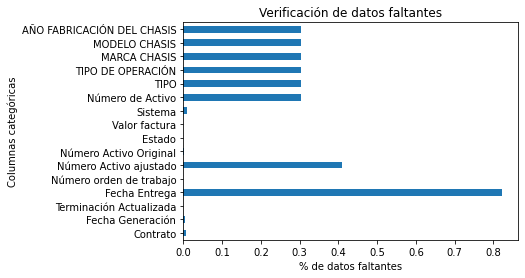

In [10]:
(df_sistemas_mtto.isna().sum()/len(dataset1)).plot(kind='barh')
plt.xlabel('% de datos faltantes')
plt.ylabel('Columnas categóricas')
plt.title('Verificación de datos faltantes')

In [11]:
df_sistemas_mtto.isna().sum()

Contrato                         839
Fecha Generación                 636
Terminación Actualizada            1
Fecha Entrega                 110876
Número orden de trabajo            0
Número Activo ajustado         55094
Número Activo Original           275
Estado                             3
Valor factura                      0
Sistema                         1366
Número de Activo               40863
TIPO                           40863
TIPO DE OPERACIÓN              40863
MARCA CHASIS                   40863
MODELO CHASIS                  40863
AÑO FABRICACIÓN DEL CHASIS     40863
dtype: int64

1. Se observan gran cantidad de datos faltantes en número de activo, que es la columna que indica el activo de unión entre la tabla de costos y la de características de los activos. Ahora se debe explorar si los datos faltantes tienen algo en común que permita imputar la información faltante.
2. Se evidencia que de la columna contrato, fecha de generación, fecha de terminación, estado, incluso del sistema es posible eliminar los datos faltantes, sin afectar de manera significativa el dataset.

Text(0.5, 1.0, 'Cantidad de datos faltantes por contrato, sistema')

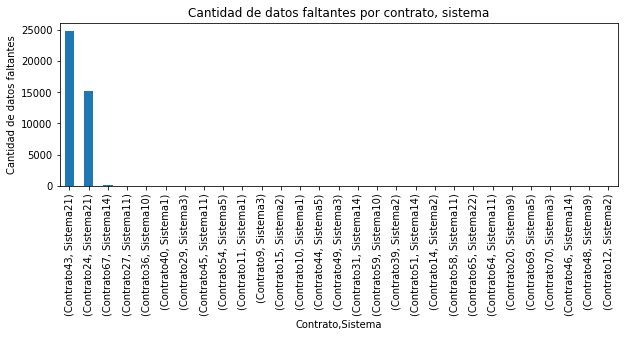

In [12]:
df_sistemas_mtto[df_sistemas_mtto['Número de Activo'].isna() == True].groupby(['Contrato','Sistema'])['Número orden de trabajo'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,3))
plt.ylabel('Cantidad de datos faltantes')
plt.title('Cantidad de datos faltantes por contrato, sistema')

1. Se observa que la mayoría de datos faltantes en las características de los sistemas corresponden al sistema 21 y el contrato 24 y 43; cabe resaltar que de acuerdo al conocimiento de la BD se sabe que los contratos 24 y 43 corresponden al contratista exclusivo para las actividades de mantenimiento general, es decir, no están asocadas a un sistema específico y cuya carga de facturación se da por lotes no por activo individual; por tanto, no hay activos relacionados y tampoco características de activos, asi que para no alterar el dataset y se pueden causar fugas estos valores faltantes no serán por la palabra Actividad General1, solo sí el contrato es el 24 o 43 o el sistema es el 21.

In [13]:
df_sistemas_mtto['TIPO DE OPERACIÓN'].value_counts()

Operacion4     42289
Operacion15    10658
Operacion2      8376
Operacion7      8002
Operacion11     5819
Operacion6      3858
Operacion10     2978
Operacion3      2840
Operacion14     2440
Operacion13     2218
Operacion5      1831
Operacion8       751
Operacion16      569
Operacion17      400
Operacion1       324
Operacion18      308
Operacion12      298
Operacion19       29
Operacion9        18
Operacion20       18
Name: TIPO DE OPERACIÓN, dtype: int64

In [14]:
columnas_activos = dataset1_activos.columns
columnas_activos

Index(['Número de Activo', 'TIPO', 'TIPO DE OPERACIÓN', 'MARCA CHASIS',
       'MODELO CHASIS', 'AÑO FABRICACIÓN DEL CHASIS'],
      dtype='object')

In [15]:
def asignacion_datos_lavado(columnas):
  for columna in columnas:
      lista = []
      df_sistemas_mtto['valnul']=df_sistemas_mtto[columna].isna()
      for i in range(len(df_sistemas_mtto)):
        if (df_sistemas_mtto['valnul'][i]==True) & ((df_sistemas_mtto['Sistema'][i]=='Sistema21') | (df_sistemas_mtto['Sistema'][i]=='Sistema14') | (df_sistemas_mtto['Sistema'][i]=='Sistema10')) & (columna == 'Número de Activo'):
          lista.append('AG') #AG: Actividad General
        elif (df_sistemas_mtto['valnul'][i]==True) & ((df_sistemas_mtto['Sistema'][i]=='Sistema21') | (df_sistemas_mtto['Sistema'][i]=='Sistema14') | (df_sistemas_mtto['Sistema'][i]=='Sistema10')) & (columna != 'Número de Activo'):
          lista.append('No aplica')
        else:
          lista.append(df_sistemas_mtto[columna][i])

      df_sistemas_mtto[f'{columna}'] = lista
      print(f'------------------------\n{columna}')
      print(df_sistemas_mtto[f'{columna}'].unique())

asignacion_datos_lavado(columnas_activos)

------------------------
Número de Activo
[270.0 377.0 245.0 236.0 390.0 271.0 383.0 233.0 405.0 393.0 371.0 402.0
 379.0 375.0 389.0 401.0 60.0 404.0 415.0 373.0 313.0 374.0 394.0 381.0
 380.0 334.0 409.0 403.0 400.0 392.0 382.0 311.0 376.0 408.0 226.0 407.0
 332.0 63.0 326.0 417.0 246.0 272.0 385.0 314.0 56.0 372.0 232.0 416.0
 324.0 419.0 384.0 53.0 387.0 59.0 57.0 378.0 316.0 386.0 418.0 62.0 406.0
 64.0 410.0 388.0 412.0 411.0 330.0 242.0 391.0 317.0 244.0 61.0 251.0
 108.0 414.0 nan 328.0 4900.0 102.0 4901.0 228.0 2.0 4602.0 4601.0 5103.0
 nan nan 312.0 nan nan nan nan 274.0 nan nan 277.0 276.0 nan 4472.0 nan
 278.0 4491.0 nan nan 300.0 nan nan 4.0 413.0 nan nan nan nan nan nan nan
 107.0 nan nan nan nan nan nan nan nan nan nan nan 285.0 nan 282.0 nan
 600.0 nan nan nan nan 284.0 547.0 nan nan nan nan nan nan nan nan nan
 4825.0 nan nan nan 283.0 279.0 nan nan nan nan nan nan nan 73.0 241.0 nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan 

In [16]:
#pd.set_option('max_rows', 30)
(df_sistemas_mtto.isna().sum()/len(dataset1))*100

Contrato                       0.622653
Fecha Generación               0.471999
Terminación Actualizada        0.000742
Fecha Entrega                 82.285188
Número orden de trabajo        0.000000
Número Activo ajustado        40.887299
Número Activo Original         0.204088
Estado                         0.002226
Valor factura                  0.000000
Sistema                        1.013759
Número de Activo               0.404465
TIPO                           0.404465
TIPO DE OPERACIÓN              0.404465
MARCA CHASIS                   0.404465
MODELO CHASIS                  0.404465
AÑO FABRICACIÓN DEL CHASIS     0.404465
valnul                         0.000000
dtype: float64

In [17]:
df_sistemas_mtto.shape

(134887, 17)

In [18]:
df_sistemas_mtto.head()

,Contrato,Fecha Generación,Terminación Actualizada,Fecha Entrega,Número orden de trabajo,Número Activo ajustado,Número Activo Original,Estado,Valor factura,Sistema,Número de Activo,TIPO,TIPO DE OPERACIÓN,MARCA CHASIS,MODELO CHASIS,AÑO FABRICACIÓN DEL CHASIS,valnul
0,Contrato34,2018-07-28,2018-09-22,2018-10-25,O66103T2018,270.0,270,Facturado,1.793857e+06,Sistema4,270.0,TipoActivo5,Operacion6,MarcaChasis3,ModeloChasis7,2005,False
1,Contrato34,2018-08-03,2018-08-03,2018-08-08,O66254T2018,377.0,377,Facturado,1.307067e+05,Sistema4,377.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2009,False
2,Contrato34,2018-08-03,2018-08-03,2018-08-14,O66255T2018,245.0,245,Facturado,1.693834e+06,Sistema4,245.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2007,False
3,Contrato34,2018-08-04,2018-08-04,2018-08-08,O66281T2018,236.0,236,Facturado,5.627988e+05,Sistema4,236.0,TipoActivo3,Operacion3,MarcaChasis3,ModeloChasis5,2007,False
4,Contrato34,2018-08-04,2018-08-05,2018-08-14,O66293T2018,390.0,390,Facturado,3.690611e+05,Sistema4,390.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2009,False


**Primer borrado de columnas inecesarias**

In [19]:
df_sistemas_mtto = df_sistemas_mtto.drop(columns=['Fecha Entrega','Número Activo ajustado','valnul'])

In [20]:
df_sistemas_mtto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134887 entries, 0 to 134886
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Contrato                    134048 non-null  object        
 1   Fecha Generación            134251 non-null  datetime64[ns]
 2   Terminación Actualizada     134886 non-null  datetime64[ns]
 3   Número orden de trabajo     134887 non-null  object        
 4   Número Activo Original      134612 non-null  object        
 5   Estado                      134884 non-null  object        
 6   Valor factura               134887 non-null  float64       
 7   Sistema                     133521 non-null  object        
 8   Número de Activo            134342 non-null  object        
 9   TIPO                        134342 non-null  object        
 10  TIPO DE OPERACIÓN           134342 non-null  object        
 11  MARCA CHASIS                134342 non-

In [21]:
#Dado que cada columna tiene una baja cantidad de valores nulos, se procede a la eliminación de los mismos
df_sistemas_mtto.dropna(inplace=True)

In [22]:
df_sistemas_mtto.reset_index(drop=True, inplace=True)

In [23]:
df_sistemas_mtto.info()
#Valor inicial de entradas 134887 por cada columna, ahora tenemos 132462, esto es aproximadamente el 1.8% de datos por columna, por lo que el borrado no afecta de manera significativa
#El dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132611 entries, 0 to 132610
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Contrato                    132611 non-null  object        
 1   Fecha Generación            132611 non-null  datetime64[ns]
 2   Terminación Actualizada     132611 non-null  datetime64[ns]
 3   Número orden de trabajo     132611 non-null  object        
 4   Número Activo Original      132611 non-null  object        
 5   Estado                      132611 non-null  object        
 6   Valor factura               132611 non-null  float64       
 7   Sistema                     132611 non-null  object        
 8   Número de Activo            132611 non-null  object        
 9   TIPO                        132611 non-null  object        
 10  TIPO DE OPERACIÓN           132611 non-null  object        
 11  MARCA CHASIS                132611 non-

In [24]:
(df_sistemas_mtto.isna().sum()/len(dataset1))*100

Contrato                      0.0
Fecha Generación              0.0
Terminación Actualizada       0.0
Número orden de trabajo       0.0
Número Activo Original        0.0
Estado                        0.0
Valor factura                 0.0
Sistema                       0.0
Número de Activo              0.0
TIPO                          0.0
TIPO DE OPERACIÓN             0.0
MARCA CHASIS                  0.0
MODELO CHASIS                 0.0
AÑO FABRICACIÓN DEL CHASIS    0.0
dtype: float64

In [25]:
#Ahora vamos a crear una variable numérica para los días
from datetime import datetime
import time
lista_date_numerico = []
for data in range(len(df_sistemas_mtto)):
  dt1 = df_sistemas_mtto['Fecha Generación'][data]
  timestamp1 = time. mktime(dt1. timetuple()) + dt1.microsecond/1e6
  dt2 = df_sistemas_mtto['Terminación Actualizada'][data]
  timestamp2 = time. mktime(dt2. timetuple()) + dt2.microsecond/1e6
  if (df_sistemas_mtto['Sistema'][data] == 'Sistema21') | (df_sistemas_mtto['Sistema'][data] == 'Sistema14'):
      lista_date_numerico.append(0)
  else:
    lista_date_numerico.append((max(timestamp1,timestamp2)-min(timestamp1,timestamp2)+86400)/86400) #Dado que no poseemos las horas la mejor aproximación es indicar que si se hace
  #la reparación el mismo día el tiempo de reparación serán 24horas, equivalentes de 86400 segundos 

df_sistemas_mtto['tiempo_reparacion_dias'] = lista_date_numerico

In [26]:
df_sistemas_mtto

,Contrato,Fecha Generación,Terminación Actualizada,Número orden de trabajo,Número Activo Original,Estado,Valor factura,Sistema,Número de Activo,TIPO,TIPO DE OPERACIÓN,MARCA CHASIS,MODELO CHASIS,AÑO FABRICACIÓN DEL CHASIS,tiempo_reparacion_dias
0,Contrato34,2018-07-28,2018-09-22,O66103T2018,270,Facturado,1.793857e+06,Sistema4,270.0,TipoActivo5,Operacion6,MarcaChasis3,ModeloChasis7,2005,57.0
1,Contrato34,2018-08-03,2018-08-03,O66254T2018,377,Facturado,1.307067e+05,Sistema4,377.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2009,1.0
2,Contrato34,2018-08-03,2018-08-03,O66255T2018,245,Facturado,1.693834e+06,Sistema4,245.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2007,1.0
3,Contrato34,2018-08-04,2018-08-04,O66281T2018,236,Facturado,5.627988e+05,Sistema4,236.0,TipoActivo3,Operacion3,MarcaChasis3,ModeloChasis5,2007,1.0
4,Contrato34,2018-08-04,2018-08-05,O66293T2018,390,Facturado,3.690611e+05,Sistema4,390.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2009,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132606,Contrato43,2020-01-09,2019-12-31,O80201T2020,5095,Facturado,4.040089e+04,Sistema21,AG,No aplica,No aplica,No aplica,No aplica,No aplica,0.0
132607,Contrato43,2020-01-09,2019-12-31,O80201T2020,5096,Facturado,2.020044e+04,Sistema21,AG,No aplica,No aplica,No aplica,No aplica,No aplica,0.0
132608,Contrato43,2020-01-09,2019-12-31,O80201T2020,5097,Facturado,2.020044e+04,Sistema21,AG,No aplica,No aplica,No aplica,No aplica,No aplica,0.0
132609,Contrato43,2020-01-09,2019-12-31,O80201T2020,4553,Facturado,2.020044e+04,Sistema21,AG,No aplica,No aplica,No aplica,No aplica,No aplica,0.0


**Borrado de filas duplicadas**

In [27]:
df_sistemas_mtto.duplicated().sum()

816

In [28]:
df_sistemas_mtto=df_sistemas_mtto.drop_duplicates()

**Segundo borrado de columnas**

Se eliminarán las columnas fecha de generación y terminación y la columna número de activo, dado que ya existe la columna: Número Activo Original

In [29]:
df_sistemas_mtto = df_sistemas_mtto.drop(columns=['Fecha Generación','Terminación Actualizada','Número orden de trabajo'])

In [30]:
df_sistemas_mtto.isna().sum()

Contrato                      0
Número Activo Original        0
Estado                        0
Valor factura                 0
Sistema                       0
Número de Activo              0
TIPO                          0
TIPO DE OPERACIÓN             0
MARCA CHASIS                  0
MODELO CHASIS                 0
AÑO FABRICACIÓN DEL CHASIS    0
tiempo_reparacion_dias        0
dtype: int64

**Corección de valores errados en el año**

AÑO FABRICACIÓN DEL CHASIS
[2005 2009 2007 2012 2003 2008 1998 1996 nan '-' 2011 2016 2020 2015 2018
 2017 2014 2019 'CG14L' 'Actividad General1']

In [31]:
#Corrección de los ítem - y CG14L, dado que estos no son valores adecuados para años.
#Para su reemplazo vamos a validar que tipo de activos son y si es posible identificar algún tipo de patrón para poder elegir un valor.
#El eliminado de filas no es viable si es muy poca informació o hace parte de un sistema único.

#pd.set_option('max_rows', 50)
pivot_table_sistemas = df_sistemas_mtto.pivot_table(index=['TIPO', 'TIPO DE OPERACIÓN', 'MARCA CHASIS', 'MODELO CHASIS','AÑO FABRICACIÓN DEL CHASIS'], aggfunc={'Número Activo Original':'nunique'})
pivot_table_sistemas

Número Activo Original
TIPO         TIPO DE OPERACIÓN MARCA CHASIS  MODELO CHASIS  AÑO FABRICACIÓN DEL CHASIS                        
No aplica    No aplica         No aplica     No aplica      No aplica                                      217
TipoActivo1  Operacion1        MarcaChasis1  ModeloChasis1  2011                                             1
                                                            2017                                             1
                                             ModeloChasis2  2011                                             1
TipoActivo10 Operacion5        MarcaChasis10 ModeloChasis16 1998                                             2
TipoActivo11 Operacion11       MarcaChasis10 ModeloChasis16 1998                                             8
                                                            2012                                             3
             Operacion12       MarcaChasis10 ModeloChasis16 1998                                             1
             Operacion3        MarcaChasis10 ModeloChasis16 2012                                             2
TipoActivo12 Operacion16       MarcaChasis11 ModeloChasis19 2017                                             2
                               MarcaChasis14 ModeloChasis23 2020                                             1
                                                            CG14L                                            1
TipoActivo13 Operacion17       MarcaChasis14 ModeloChasis23 2020                                             1
                                                            CG14L                                            2
                               MarcaChasis2  ModeloChasis20 2019                                             2
TipoActivo14 Operacion18       MarcaChasis12 ModeloChasis21 -                                                3
TipoActivo15 Operacion19       MarcaChasis13 ModeloChasis22 2011                                             3
TipoActivo16 Operacion20       MarcaChasis15 ModeloChasis24 2016                                             2
TipoActivo17 Operacion4        MarcaChasis16 ModeloChasis26 2014                                            91
TipoActivo2  Operacion2        MarcaChasis2  ModeloChasis3  1998                                             3
                                             ModeloChasis4  2003                                             2
                                                            2008                                             4
                                                            2012                                             2
TipoActivo3  Operacion13       MarcaChasis3  ModeloChasis5  2009                                             2
             Operacion14       MarcaChasis3  ModeloChasis5  2009                                             2
             Operacion15       MarcaChasis2  ModeloChasis17 2012                                            10
             Operacion3        MarcaChasis3  ModeloChasis5  2007                                             5
             Operacion4        MarcaChasis3  ModeloChasis5  2007                                             5
                                                            2009                                            21
TipoActivo4  Operacion5        MarcaChasis4  ModeloChasis6  1996                                             2
TipoActivo5  Operacion6        MarcaChasis2  ModeloChasis18 2012                                             3
                               MarcaChasis3  ModeloChasis7  2005                                             3
TipoActivo6  Operacion7        MarcaChasis5  ModeloChasis12 2017                                             6
                                             ModeloChasis13 2018                                             2
                                             ModeloChasis8  2008                            

In [32]:
df_sistemas_mtto[df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS']!='No aplica']['AÑO FABRICACIÓN DEL CHASIS'].mode()
#En el caso del año CG14L, los valores serán imputados por 2020 dado que la misma marca de chasis y modelo de chasis tiene este año de modelo asignado
#En el caso del año -, los valores serán imputados por 2009 dado que es el año más frecuente cuando no es el campo 'No aplica'

0    2009
Name: AÑO FABRICACIÓN DEL CHASIS, dtype: object

**Reemplazo de valores atípicos en la columna AÑO FABRICACIÓN DEL CHASIS**

In [33]:
df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'] = df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'].replace({'-':'2009','CG14L':'2020'})

In [34]:
df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS']=df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'].astype('object')

**Diagramas de barras para cada uno de las características y la columna objetivo**

In [35]:
df_sistemas_mtto['Número de Activo'] = df_sistemas_mtto['Número de Activo'].astype('object')

In [36]:
df_sistemas_mtto.describe(include='all')

,Contrato,Número Activo Original,Estado,Valor factura,Sistema,Número de Activo,TIPO,TIPO DE OPERACIÓN,MARCA CHASIS,MODELO CHASIS,AÑO FABRICACIÓN DEL CHASIS,tiempo_reparacion_dias
count,131795,131795.0,131795,1.317950e+05,131795,131795,131795,131795,131795,131795,131795,131795.000000
unique,50,438.0,18,NaN,19,222,18,21,17,27,19,NaN
top,Contrato24,386.0,Facturado,NaN,Sistema21,AG,TipoActivo3,Operacion4,No aplica,No aplica,No aplica,NaN
freq,42556,1353.0,128524,NaN,80124,40191,44140,41044,40191,40191,40191,NaN
mean,NaN,NaN,NaN,2.411168e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.292090
std,NaN,NaN,NaN,1.414556e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.786143
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.738121e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,3.035918e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,6.060133e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [37]:
df_sistemas_mtto['Estado'].value_counts()

Facturado                      128524
Anulado                          1529
No reportado                      890
Estimado                          354
Generación OW                     128
Revisión Garantías                116
Autorización OW                   100
Corrección en Taller 1             71
\nRevisión Admin                   20
Corrección en Taller 2             16
Levante Garantías                  15
Pendiente AC                       10
Revisión Corrección 1               7
Ultima Corrección en Taller         5
Reportado                           4
Informe Decadal                     3
anulada                             2
anulado                             1
Name: Estado, dtype: int64

In [38]:
# En la columna Estado se observa que Anulado tiene otras dos opciones de escritura quedeben ser corregidas y Revisión Admin tiene un \n delante de él
df_sistemas_mtto['Estado'] = df_sistemas_mtto['Estado'].replace({'anulada':'Anulado', 'anulado':'Anulado','\nRevisión Admin':'Revisión Admin'})

In [39]:
df_sistemas_mtto['Estado'].value_counts()

Facturado                      128524
Anulado                          1532
No reportado                      890
Estimado                          354
Generación OW                     128
Revisión Garantías                116
Autorización OW                   100
Corrección en Taller 1             71
Revisión Admin                     20
Corrección en Taller 2             16
Levante Garantías                  15
Pendiente AC                       10
Revisión Corrección 1               7
Ultima Corrección en Taller         5
Reportado                           4
Informe Decadal                     3
Name: Estado, dtype: int64

**Creación de gráficas de barras para las columna**

In [40]:
df_sistemas_mtto.columns

Index(['Contrato', 'Número Activo Original', 'Estado', 'Valor factura',
       'Sistema', 'Número de Activo', 'TIPO', 'TIPO DE OPERACIÓN',
       'MARCA CHASIS', 'MODELO CHASIS', 'AÑO FABRICACIÓN DEL CHASIS',
       'tiempo_reparacion_dias'],
      dtype='object')

In [41]:
df_sistemas_mtto['Actividad_General'] = (df_sistemas_mtto['Sistema'] == 'Sistema21') | (df_sistemas_mtto['Sistema'] == 'Sistema24')

In [42]:
df_sistemas_mtto['Actividad_General'].value_counts(normalize=True)

True     0.607944
False    0.392056
Name: Actividad_General, dtype: float64

In [43]:
df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS']=df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'].astype('object')

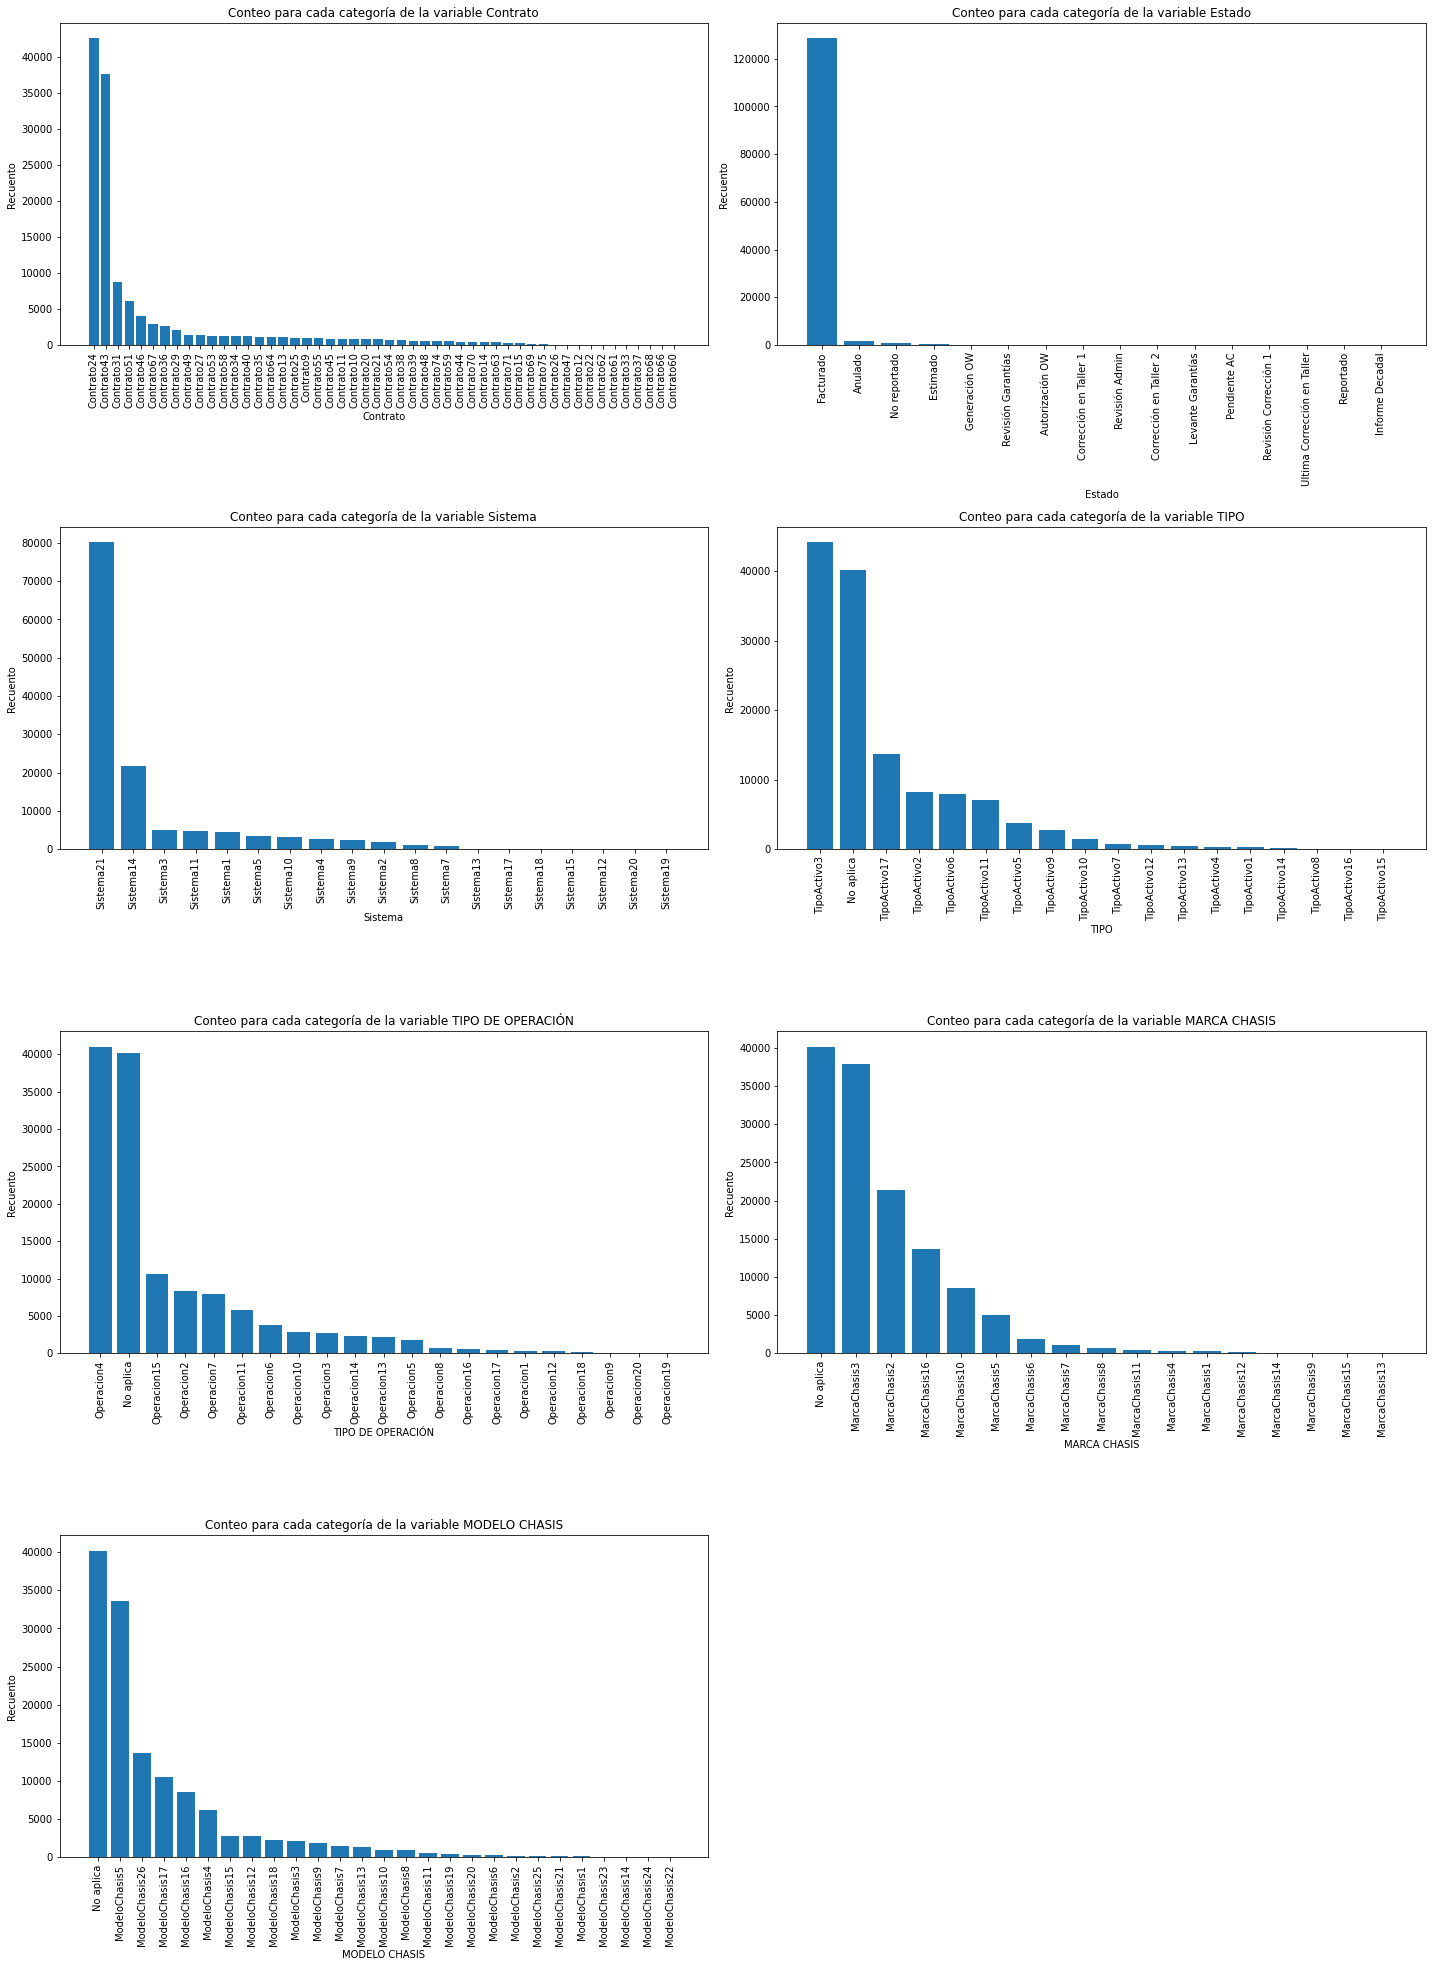

In [44]:
lista_graficas = ['Contrato', 'Estado','Sistema', 'TIPO', 'TIPO DE OPERACIÓN',
                  'MARCA CHASIS', 'MODELO CHASIS']
fig = plt.figure(figsize=(20,40))
for i in range(len(lista_graficas)):
    axes = fig.add_subplot(6,2,i+1)
    axes.bar(df_sistemas_mtto[lista_graficas[i]].value_counts().index,df_sistemas_mtto[lista_graficas[i]].value_counts().values)
    fig.tight_layout()
    plt.xlabel(lista_graficas[i])
    plt.ylabel('Recuento')
    plt.title(f'Conteo para cada categoría de la variable {lista_graficas[i]}')
    plt.xticks(rotation=90)
plt.show()


**Conclusiones preliminares:**

1.


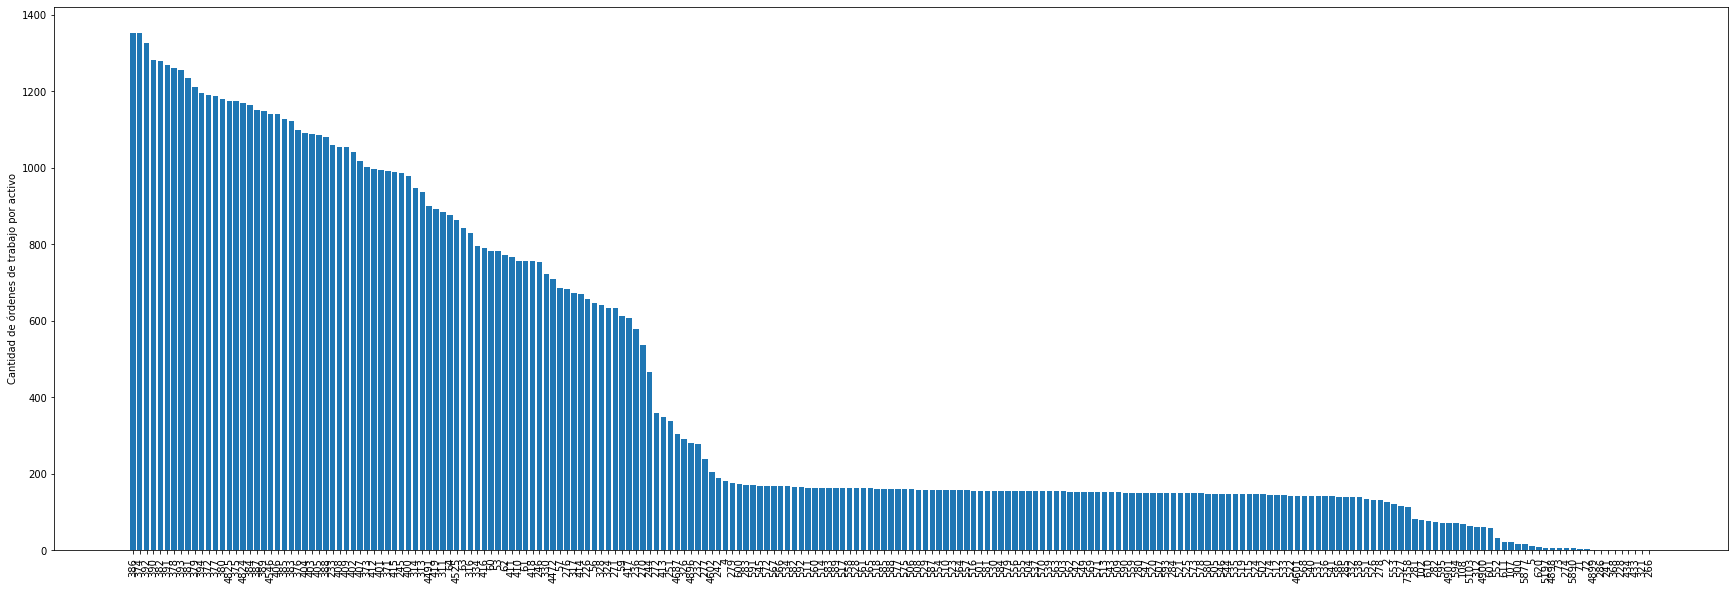

In [45]:
lista_posiciones = []
for i in range(len(df_sistemas_mtto[df_sistemas_mtto['TIPO']!='No aplica']['Número Activo Original'].value_counts())):
    lista_posiciones.append(i+1)
fig = plt.figure(figsize=(30,10))
plt.bar(lista_posiciones,df_sistemas_mtto[df_sistemas_mtto['TIPO']!='No aplica']['Número Activo Original'].value_counts().values)
plt.xticks(lista_posiciones,df_sistemas_mtto[df_sistemas_mtto['TIPO']!='No aplica']['Número Activo Original'].value_counts().index,rotation=90)
plt.ylabel('Cantidad de órdenes de trabajo por activo')
plt.show()

In [46]:
df_groupby = df_sistemas_mtto.groupby(['TIPO'])['Valor factura'].sum().sort_values(ascending=False)
df_groupby

TIPO
TipoActivo3     1.781224e+10
TipoActivo6     5.967802e+09
TipoActivo2     1.747707e+09
No aplica       1.397314e+09
TipoActivo5     1.356877e+09
TipoActivo11    1.341342e+09
TipoActivo9     1.065921e+09
TipoActivo17    3.401412e+08
TipoActivo7     1.827462e+08
TipoActivo10    1.647787e+08
TipoActivo12    1.598502e+08
TipoActivo1     7.651602e+07
TipoActivo13    6.969582e+07
TipoActivo4     6.205606e+07
TipoActivo14    2.773661e+07
TipoActivo16    3.483153e+06
TipoActivo8     1.041932e+06
TipoActivo15    7.400253e+05
Name: Valor factura, dtype: float64

<AxesSubplot:>

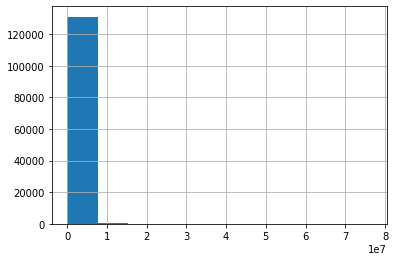

In [47]:
df_sistemas_mtto['Valor factura'].hist()

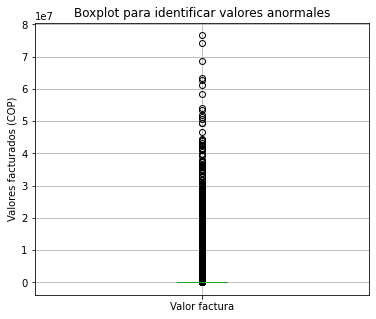

In [48]:
plt.figure(figsize=(6,5))
df_sistemas_mtto.boxplot(column='Valor factura')
plt.title('Boxplot para identificar valores anormales')
plt.ylabel('Valores facturados (COP)')
plt.show()

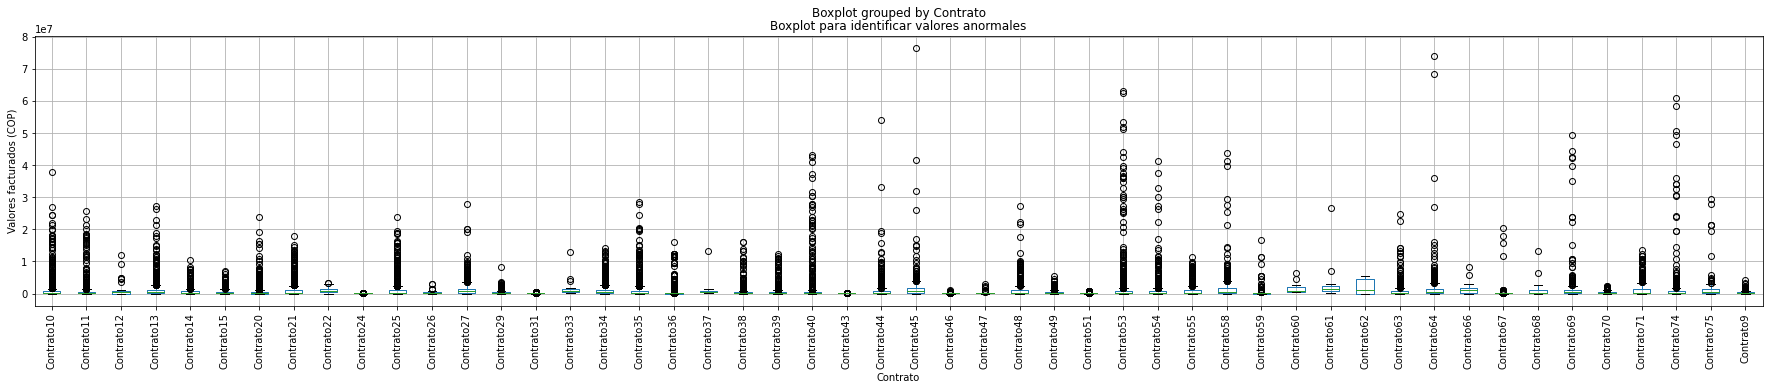

In [49]:
df_sistemas_mtto.boxplot(column='Valor factura', by='Contrato',figsize=(30,5))
plt.title('Boxplot para identificar valores anormales')
plt.xticks(rotation=90)
plt.ylabel('Valores facturados (COP)')
plt.show()

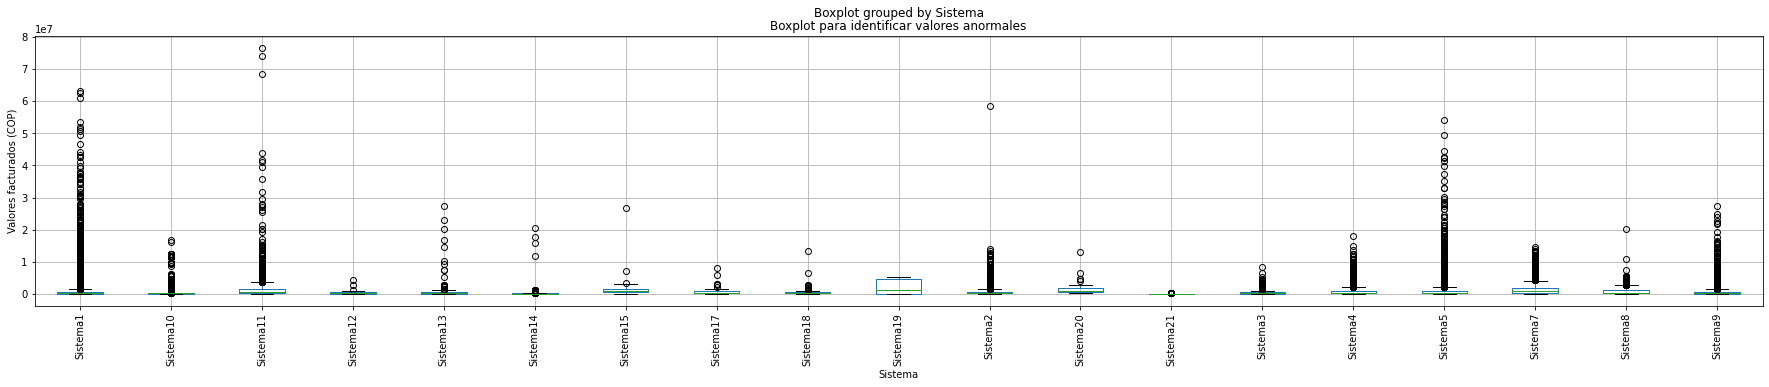

In [50]:
df_sistemas_mtto.boxplot(column='Valor factura', by='Sistema',figsize=(30,5))
plt.title('Boxplot para identificar valores anormales')
plt.xticks(rotation=90)
plt.ylabel('Valores facturados (COP)')
plt.show()

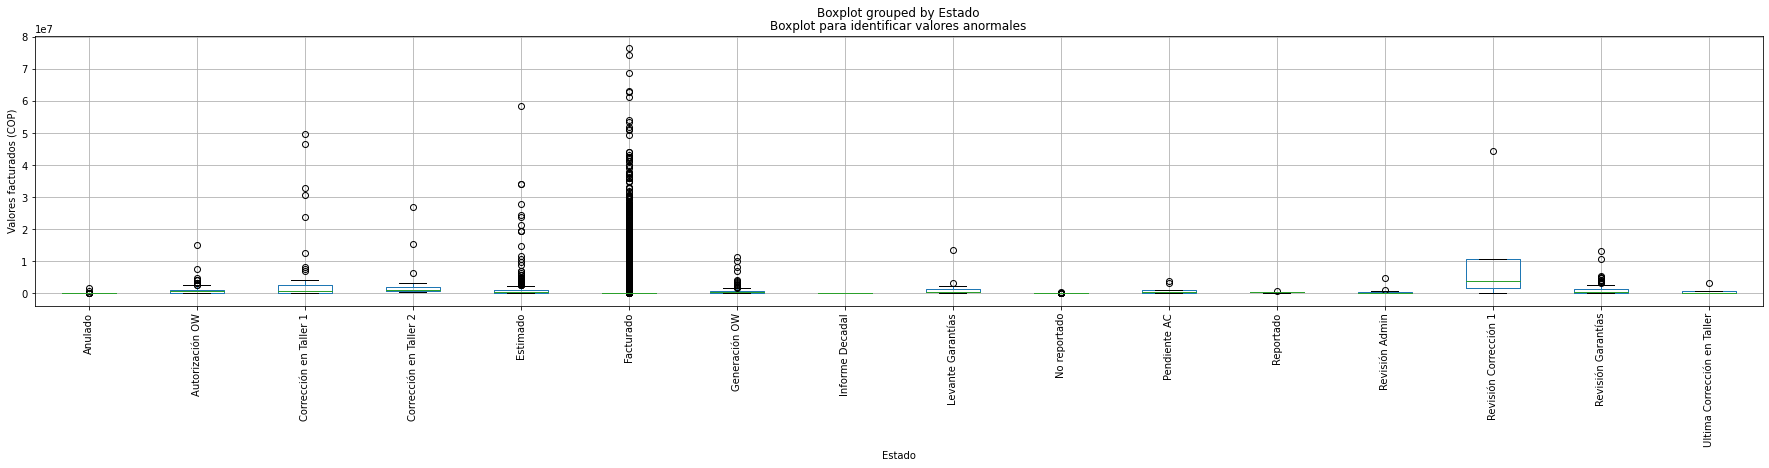

In [51]:
df_sistemas_mtto.boxplot(column='Valor factura', by='Estado',figsize=(30,5))
plt.title('Boxplot para identificar valores anormales')
plt.xticks(rotation=90)
plt.ylabel('Valores facturados (COP)')
plt.show()

In [52]:
df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS']=df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'].replace({'2009':2009,2009:2009,'2020':2020,2020:2020})
df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'].value_counts()

No aplica    40191
2009         28797
2012         18112
2014         13636
2008          7003
1998          6836
2007          4967
2017          3231
2015          1852
2005          1697
2016          1593
2003          1396
2018          1312
2019           357
1996           338
2011           319
2020           158
Name: AÑO FABRICACIÓN DEL CHASIS, dtype: int64

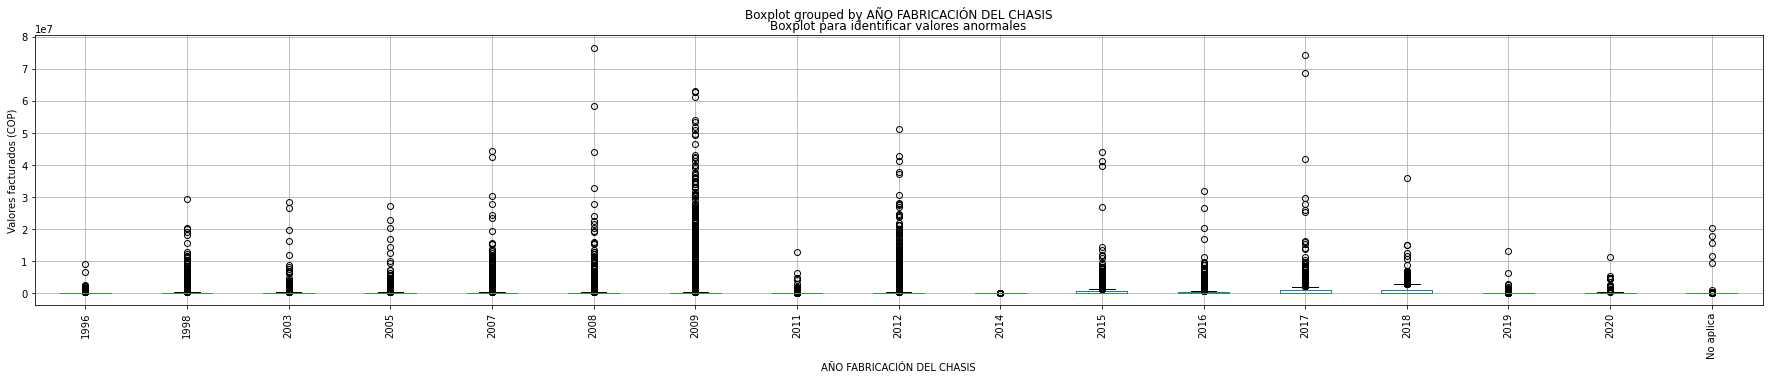

In [53]:
df_sistemas_mtto.boxplot(column='Valor factura', by='AÑO FABRICACIÓN DEL CHASIS',figsize=(30,5))
plt.title('Boxplot para identificar valores anormales')
plt.xticks(rotation=90)
plt.ylabel('Valores facturados (COP)')
plt.show()

In [54]:
df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'].value_counts()

No aplica    40191
2009         28797
2012         18112
2014         13636
2008          7003
1998          6836
2007          4967
2017          3231
2015          1852
2005          1697
2016          1593
2003          1396
2018          1312
2019           357
1996           338
2011           319
2020           158
Name: AÑO FABRICACIÓN DEL CHASIS, dtype: int64

Si bien hay presencia de valores atípicos para algunos contratos, se observa que son algunos sistemas espécíficos los que presentan un serie de valores atípicos, pero se debe tener presente que:
1- La mayor cantidad de valores atípicos corresponde a órdenes de trabajo facturadas.
2- Los valores que están es Estado facturado es por que corresponden a trabajor y reparaciones reales las cuales han pasado por al menos 5 revisiones anteriores antes de proceder con el pago; por tanto, a pesar de ser valores extreños son reales y corresponde a algunos sistemas, no a todos, lo que podría facilitar el reconocimiento de los mismos.
3- Se debe tener presente que hablamos de activos físicos, por lo que se desgastan con el tiempo, por lo que se ha de esperar que con el tiempo las reparaciones vayan costando cada vez más, tambíen en función del tipo de operación y horas de trabajo del activo, esto queda clara en el BOXPLOT donde se observa que varios de los modelos más antiguos presentan mayor cantidad de valores altos de reparación.
Dado lo anterior, ninguno de los valores que se observan como atípicos se retira.


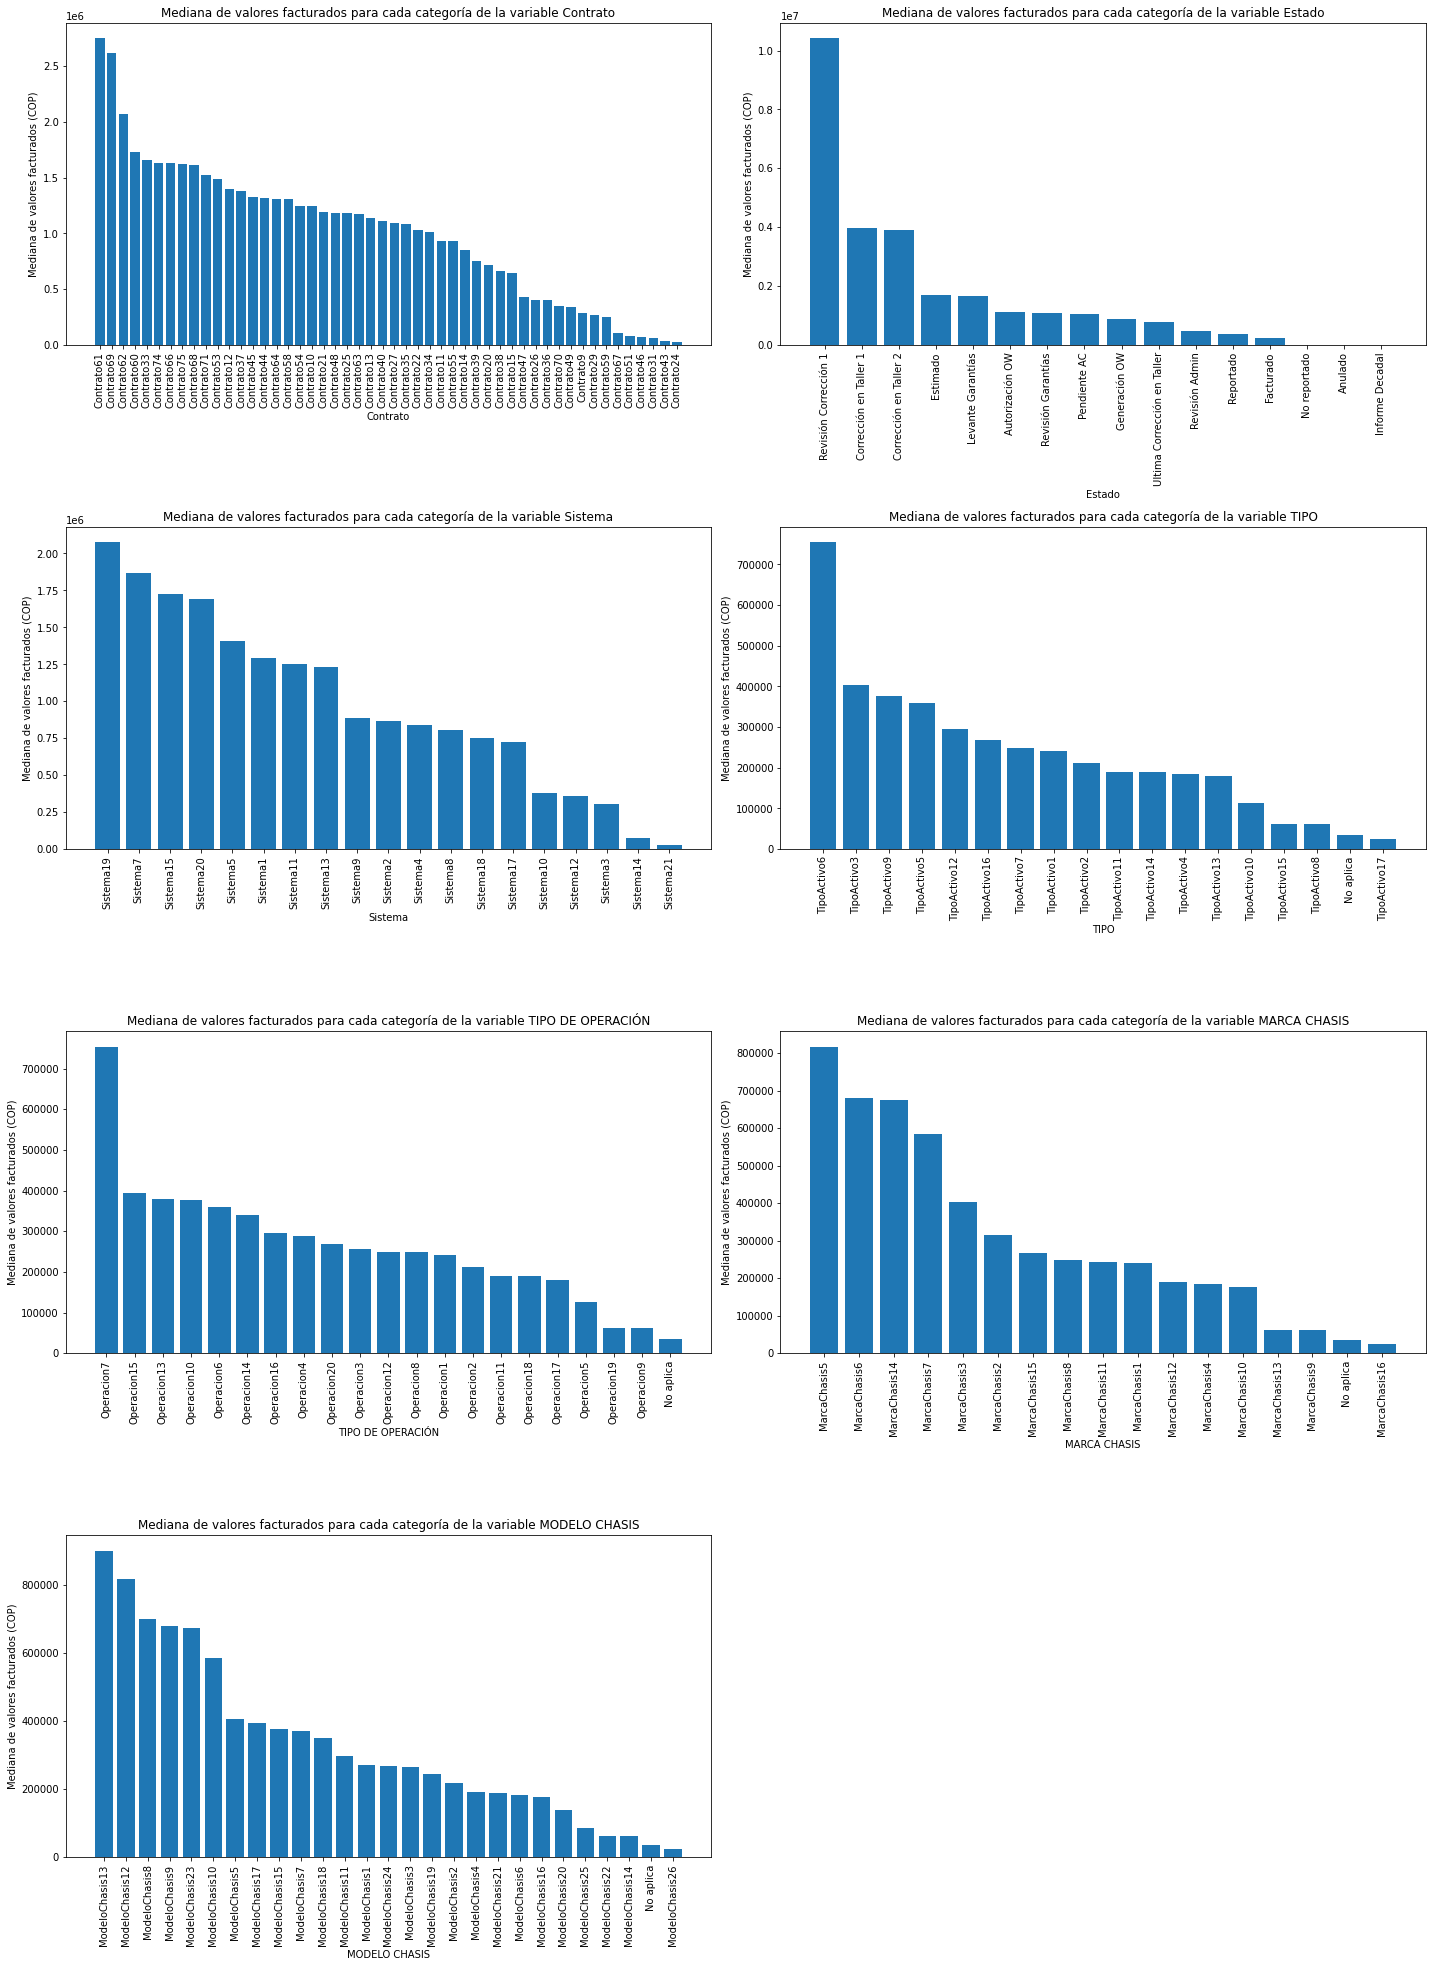

In [55]:
lista_graficas = ['Contrato', 'Estado','Sistema', 'TIPO', 'TIPO DE OPERACIÓN',
                  'MARCA CHASIS', 'MODELO CHASIS']
fig = plt.figure(figsize=(20,40))
for i in range(len(lista_graficas)):
    df_groupby = df_sistemas_mtto.groupby(lista_graficas[i])['Valor factura'].mean().sort_values(ascending=False)
    axes = fig.add_subplot(6,2,i+1)
    axes.bar(df_groupby.index,df_groupby.values)
    fig.tight_layout()
    plt.xlabel(lista_graficas[i])
    plt.ylabel('Mediana de valores facturados (COP)')
    plt.title(f'Mediana de valores facturados para cada categoría de la variable {lista_graficas[i]}')
    plt.xticks(rotation=90)
plt.show()

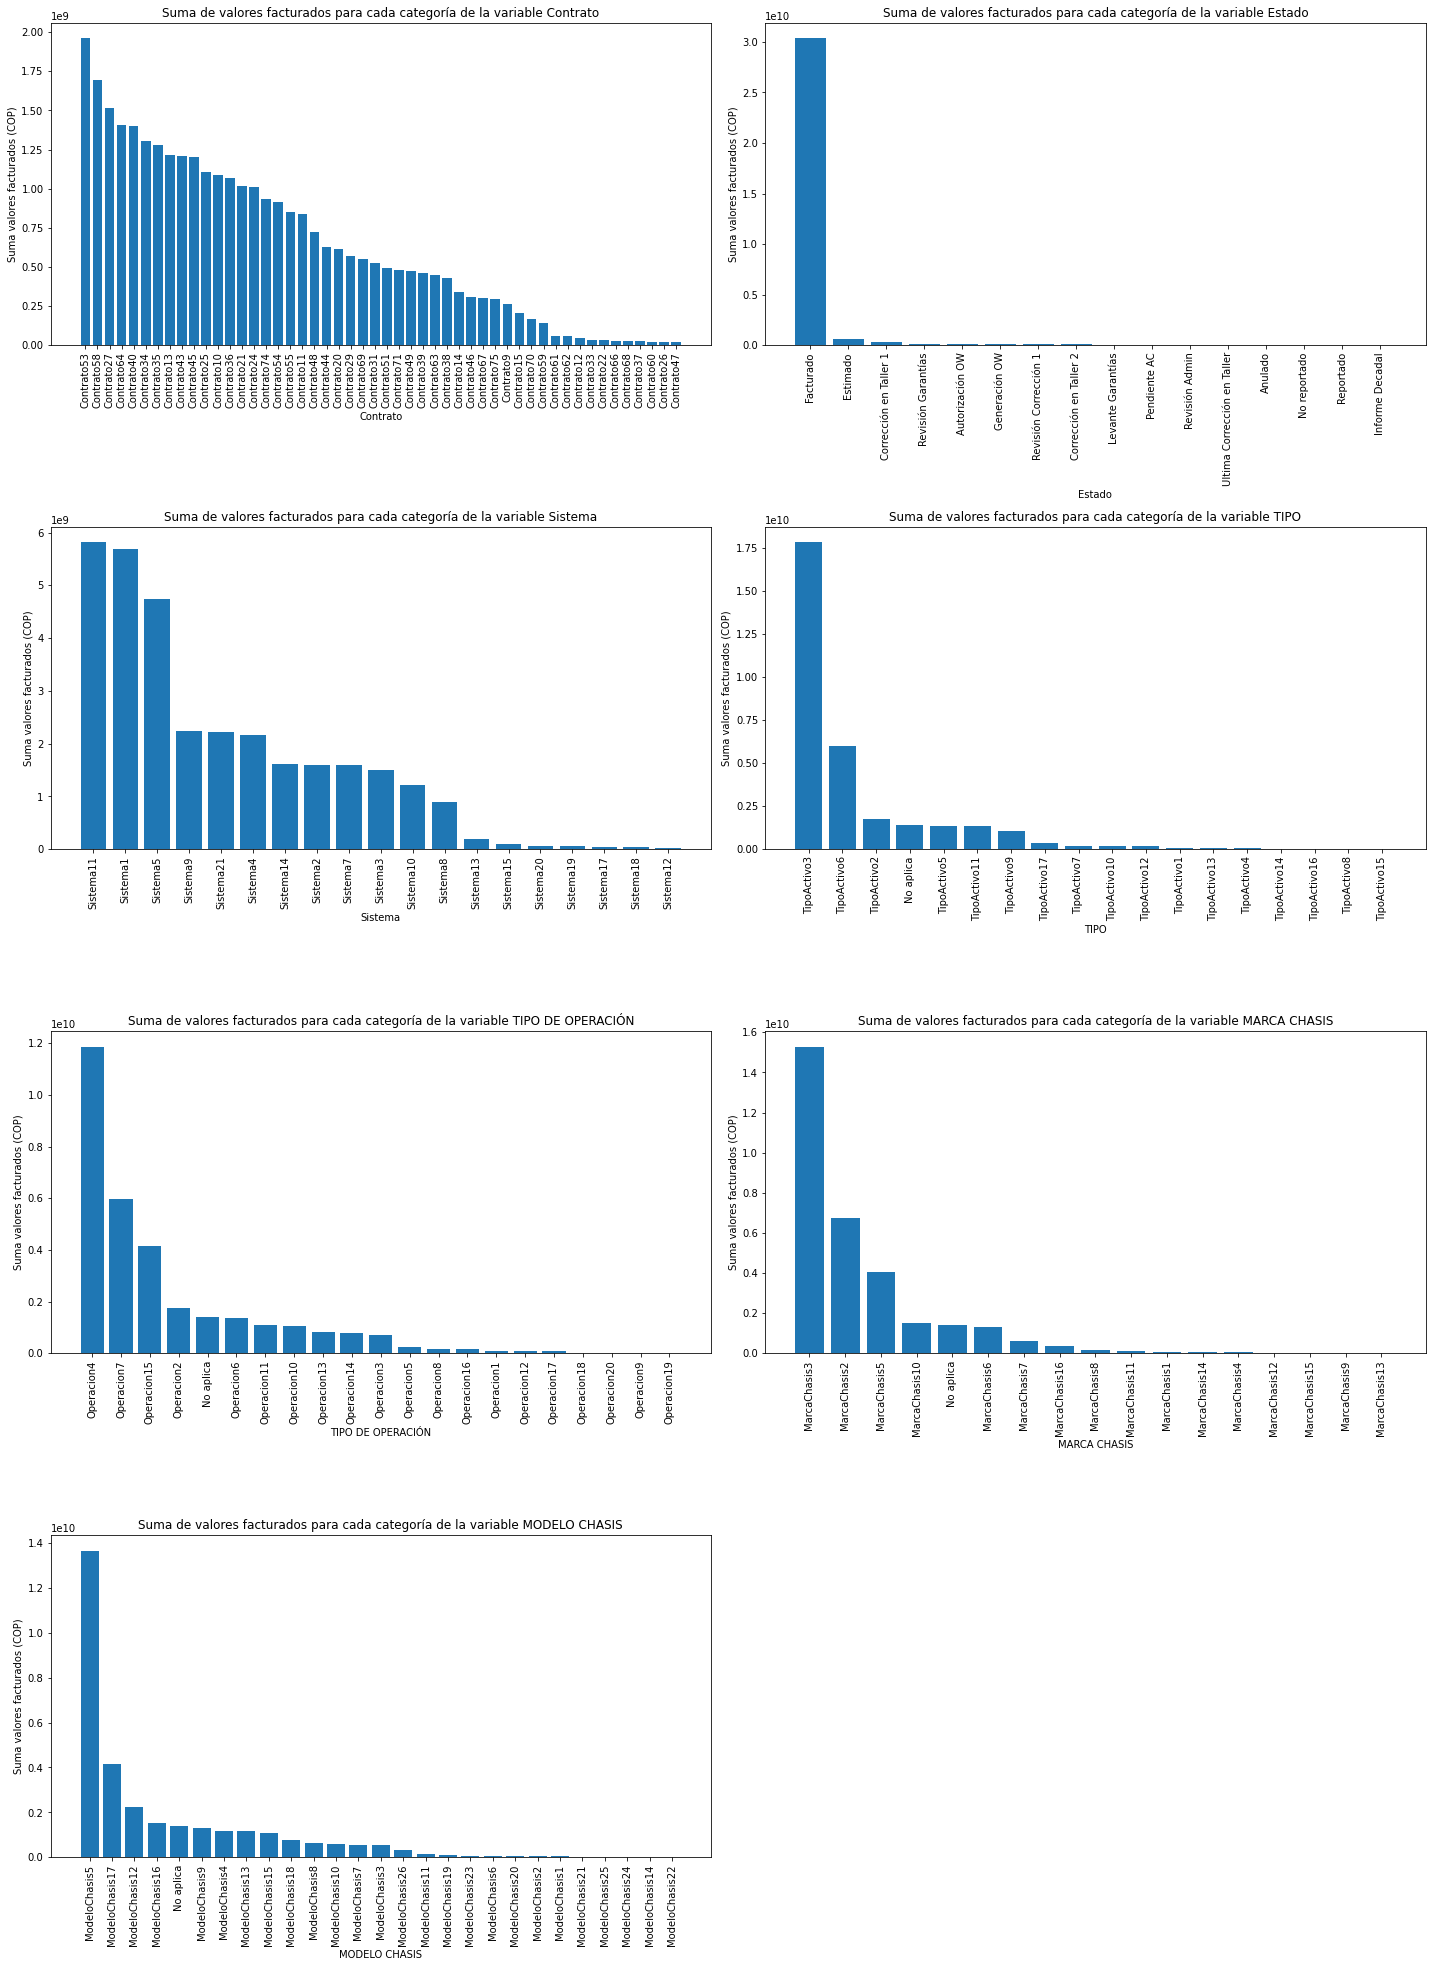

In [56]:
lista_graficas = ['Contrato', 'Estado','Sistema', 'TIPO', 'TIPO DE OPERACIÓN',
                  'MARCA CHASIS', 'MODELO CHASIS']
fig = plt.figure(figsize=(20,40))
for i in range(len(lista_graficas)):
    df_groupby = df_sistemas_mtto.groupby(lista_graficas[i])['Valor factura'].sum().sort_values(ascending=False)
    axes = fig.add_subplot(6,2,i+1)
    axes.bar(df_groupby.index,df_groupby.values)
    fig.tight_layout()
    plt.xlabel(lista_graficas[i])
    plt.ylabel('Suma valores facturados (COP)')
    plt.title(f'Suma de valores facturados para cada categoría de la variable {lista_graficas[i]}')
    plt.xticks(rotation=90)
plt.show()

**MAPA DE CALOR PARA CORRELACIONES**

In [57]:
corr_var = df_sistemas_mtto.corr()
corr_var

,Valor factura,tiempo_reparacion_dias,Actividad_General
Valor factura,1.000000,0.298756,-0.187901
tiempo_reparacion_dias,0.298756,1.000000,-0.183128
Actividad_General,-0.187901,-0.183128,1.000000


In [58]:
df_sistemas_mtto.columns

Index(['Contrato', 'Número Activo Original', 'Estado', 'Valor factura',
       'Sistema', 'Número de Activo', 'TIPO', 'TIPO DE OPERACIÓN',
       'MARCA CHASIS', 'MODELO CHASIS', 'AÑO FABRICACIÓN DEL CHASIS',
       'tiempo_reparacion_dias', 'Actividad_General'],
      dtype='object')

In [59]:
#Para poder ver la correlación general vamos a transformar la matriz en variables dummy
columnas = ['Contrato', 'Estado','Sistema', 'TIPO', 'TIPO DE OPERACIÓN',
            'MARCA CHASIS', 'MODELO CHASIS', 'AÑO FABRICACIÓN DEL CHASIS']
df_sistemas_mtto_dummi1 = pd.get_dummies(df_sistemas_mtto, columns=columnas, drop_first=True)

In [60]:
df_sistemas_mtto_dummi1

,Número Activo Original,Valor factura,Número de Activo,tiempo_reparacion_dias,Actividad_General,Contrato_Contrato11,Contrato_Contrato12,Contrato_Contrato13,Contrato_Contrato14,Contrato_Contrato15,...,AÑO FABRICACIÓN DEL CHASIS_2011,AÑO FABRICACIÓN DEL CHASIS_2012,AÑO FABRICACIÓN DEL CHASIS_2014,AÑO FABRICACIÓN DEL CHASIS_2015,AÑO FABRICACIÓN DEL CHASIS_2016,AÑO FABRICACIÓN DEL CHASIS_2017,AÑO FABRICACIÓN DEL CHASIS_2018,AÑO FABRICACIÓN DEL CHASIS_2019,AÑO FABRICACIÓN DEL CHASIS_2020,AÑO FABRICACIÓN DEL CHASIS_No aplica
0,270,1.793857e+06,270.0,57.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,377,1.307067e+05,377.0,1.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,245,1.693834e+06,245.0,1.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,236,5.627988e+05,236.0,1.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,390,3.690611e+05,390.0,2.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132606,5095,4.040089e+04,AG,0.0,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
132607,5096,2.020044e+04,AG,0.0,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
132608,5097,2.020044e+04,AG,0.0,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
132609,4553,2.020044e+04,AG,0.0,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
corr_dumi = df_sistemas_mtto_dummi1.corr()

In [62]:
corr_dumi

,Valor factura,tiempo_reparacion_dias,Actividad_General,Contrato_Contrato11,Contrato_Contrato12,Contrato_Contrato13,Contrato_Contrato14,Contrato_Contrato15,Contrato_Contrato20,Contrato_Contrato21,...,AÑO FABRICACIÓN DEL CHASIS_2011,AÑO FABRICACIÓN DEL CHASIS_2012,AÑO FABRICACIÓN DEL CHASIS_2014,AÑO FABRICACIÓN DEL CHASIS_2015,AÑO FABRICACIÓN DEL CHASIS_2016,AÑO FABRICACIÓN DEL CHASIS_2017,AÑO FABRICACIÓN DEL CHASIS_2018,AÑO FABRICACIÓN DEL CHASIS_2019,AÑO FABRICACIÓN DEL CHASIS_2020,AÑO FABRICACIÓN DEL CHASIS_No aplica
Valor factura,1.000000,0.298756,-0.187901,0.040554,0.013188,0.057440,0.023934,0.014083,0.027202,0.054092,...,-0.000553,0.022862,-0.051915,0.033951,0.022888,0.055059,0.046708,-0.003739,0.007541,-0.096626
tiempo_reparacion_dias,0.298756,1.000000,-0.183128,0.019684,0.001778,0.020126,0.041751,0.018443,0.019008,0.018648,...,0.006974,0.027743,-0.049952,0.052840,0.021035,0.034234,0.034141,-0.001616,0.004863,-0.097399
Actividad_General,-0.187901,-0.183128,1.000000,-0.103083,-0.020003,-0.112288,-0.068534,-0.060660,-0.101039,-0.100565,...,0.002235,-0.221191,0.272754,-0.055180,-0.056102,-0.075201,-0.069136,0.007465,-0.038650,0.528143
Contrato_Contrato11,0.040554,0.019684,-0.103083,1.000000,-0.001330,-0.007465,-0.004556,-0.004032,-0.006717,-0.006685,...,-0.002199,0.008773,-0.028122,0.000310,-0.006623,-0.013123,-0.008301,-0.004314,-0.002868,-0.054832
Contrato_Contrato12,0.013188,0.001778,-0.020003,-0.001330,1.000000,-0.001449,-0.000884,-0.000783,-0.001303,-0.001297,...,-0.000791,-0.005040,-0.005457,-0.001918,-0.001777,-0.002547,-0.001611,-0.000837,-0.000557,-0.010640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AÑO FABRICACIÓN DEL CHASIS_2017,0.055059,0.034234,-0.075201,-0.013123,-0.002547,-0.014295,-0.008725,-0.007722,-0.012863,-0.012803,...,-0.007809,-0.063277,-0.053854,-0.018926,-0.017535,1.000000,-0.015896,-0.008262,-0.005492,-0.105006
AÑO FABRICACIÓN DEL CHASIS_2018,0.046708,0.034141,-0.069136,-0.008301,-0.001611,-0.009042,-0.005519,-0.004885,-0.008136,-0.008098,...,-0.004939,-0.040024,-0.034064,-0.011971,-0.011091,-0.015896,1.000000,-0.005226,-0.003474,-0.066420
AÑO FABRICACIÓN DEL CHASIS_2019,-0.003739,-0.001616,0.007465,-0.004314,-0.000837,-0.004699,-0.002868,-0.002539,-0.004229,-0.004209,...,-0.002567,-0.020802,-0.017705,-0.006222,-0.005765,-0.008262,-0.005226,1.000000,-0.001806,-0.034521
AÑO FABRICACIÓN DEL CHASIS_2020,0.007541,0.004863,-0.038650,-0.002868,-0.000557,-0.003124,-0.001907,-0.001688,-0.002811,-0.002798,...,-0.001707,-0.013828,-0.011769,-0.004136,-0.003832,-0.005492,-0.003474,-0.001806,1.000000,-0.022948


In [63]:
lista_sistemas = ['Sistema_Sistema10','Sistema_Sistema11','Sistema_Sistema12','Sistema_Sistema13','Sistema_Sistema14','Sistema_Sistema15','Sistema_Sistema17','Sistema_Sistema18','Sistema_Sistema19','Sistema_Sistema2','Sistema_Sistema20','Sistema_Sistema21','Sistema_Sistema3','Sistema_Sistema4','Sistema_Sistema5','Sistema_Sistema7','Sistema_Sistema8','Sistema_Sistema9']

In [64]:
#Se filtra solo por los sistemas que es lo que deseamos conocer
df_corr_sistema = corr_dumi.loc[lista_sistemas]

In [65]:
df_corr_sistema

,Valor factura,tiempo_reparacion_dias,Actividad_General,Contrato_Contrato11,Contrato_Contrato12,Contrato_Contrato13,Contrato_Contrato14,Contrato_Contrato15,Contrato_Contrato20,Contrato_Contrato21,...,AÑO FABRICACIÓN DEL CHASIS_2011,AÑO FABRICACIÓN DEL CHASIS_2012,AÑO FABRICACIÓN DEL CHASIS_2014,AÑO FABRICACIÓN DEL CHASIS_2015,AÑO FABRICACIÓN DEL CHASIS_2016,AÑO FABRICACIÓN DEL CHASIS_2017,AÑO FABRICACIÓN DEL CHASIS_2018,AÑO FABRICACIÓN DEL CHASIS_2019,AÑO FABRICACIÓN DEL CHASIS_2020,AÑO FABRICACIÓN DEL CHASIS_No aplica
Sistema_Sistema10,0.015329,0.025451,-0.196027,-0.013031,-0.002529,-0.014195,-0.008664,-0.007668,-0.012773,-0.012713,...,0.010340,0.028266,-0.053477,0.035340,0.022365,0.016887,0.017550,0.001299,0.043079,-0.103627
Sistema_Sistema11,0.136389,0.113730,-0.238141,-0.015831,-0.003072,-0.017245,-0.010525,-0.009316,-0.015517,-0.015444,...,-0.009420,-0.076333,-0.064966,0.325174,0.211815,0.422590,0.345792,-0.009967,-0.006625,-0.126673
Sistema_Sistema12,0.001600,0.006109,-0.023769,-0.001580,-0.000307,-0.001721,-0.001051,-0.000930,-0.001549,-0.001541,...,-0.000940,0.027031,-0.006484,-0.002279,0.001528,-0.003026,-0.001914,-0.000995,-0.000661,-0.012643
Sistema_Sistema13,0.024375,0.035888,-0.043278,-0.002877,-0.000558,0.155709,-0.001913,-0.001693,-0.002820,-0.000082,...,-0.001712,-0.013872,-0.011807,-0.004149,-0.003844,-0.005510,-0.003485,-0.001811,-0.001204,-0.023021
Sistema_Sistema14,-0.052478,-0.065487,-0.554522,-0.036863,-0.007153,-0.040155,-0.024508,-0.021692,-0.036132,-0.035963,...,-0.005314,0.178367,-0.151276,-0.052989,-0.006842,-0.063993,-0.044653,-0.005137,0.019385,-0.290263
Sistema_Sistema15,0.020847,0.018603,-0.024740,-0.001645,-0.000319,-0.001791,-0.001093,-0.000968,-0.001612,-0.001604,...,-0.000979,-0.007930,-0.006749,-0.002372,0.148146,-0.003150,-0.001992,-0.001035,0.098682,-0.013160
Sistema_Sistema17,0.007389,0.014293,-0.027015,-0.001796,-0.000348,-0.001956,-0.001194,-0.001057,-0.001760,-0.001752,...,-0.001069,-0.008659,-0.007370,-0.002590,-0.002400,0.136848,-0.002175,-0.001131,-0.000752,-0.014370
Sistema_Sistema18,0.007612,0.010278,-0.026353,-0.001752,-0.000340,-0.001908,-0.001165,-0.001031,-0.001717,-0.001709,...,-0.001042,-0.008447,-0.007189,-0.002526,0.007507,-0.003355,-0.002122,0.371563,0.019998,-0.014018
Sistema_Sistema19,0.018555,0.006825,-0.017825,-0.001185,-0.000230,-0.001291,-0.000788,-0.000697,-0.001161,-0.001156,...,-0.000705,-0.005714,-0.004863,-0.001709,-0.001583,-0.002269,-0.001435,-0.000746,0.413178,-0.009482
Sistema_Sistema2,0.052531,0.087105,-0.148540,-0.009875,0.134666,-0.010756,0.461383,0.408372,-0.009679,-0.009633,...,-0.005876,0.011037,-0.040523,-0.014241,-0.006110,-0.018493,-0.011961,-0.006217,0.001460,-0.079012


In [66]:
#DETERMINACIÓN DE CORRELACIÓN FUERTE
corr_fuerte=df_corr_sistema[(df_corr_sistema>=0.7) | (df_corr_sistema<=-0.7)]
#% De datos que contienen información que tiene una correlación fuerte con los sistemas analizados
(1-((corr_fuerte.isna().sum())/len(corr_fuerte)))*100

Valor factura                           0.000000
tiempo_reparacion_dias                  0.000000
Actividad_General                       5.555556
Contrato_Contrato11                     0.000000
Contrato_Contrato12                     0.000000
                                          ...   
AÑO FABRICACIÓN DEL CHASIS_2017         0.000000
AÑO FABRICACIÓN DEL CHASIS_2018         0.000000
AÑO FABRICACIÓN DEL CHASIS_2019         0.000000
AÑO FABRICACIÓN DEL CHASIS_2020         0.000000
AÑO FABRICACIÓN DEL CHASIS_No aplica    0.000000
Length: 180, dtype: float64

In [67]:
#DETERMINACIÓN DE CORRELACIÓN MODERADA
corr_moderada=df_corr_sistema[((df_corr_sistema<0.7) & (df_corr_sistema>=0.5)) | ((df_corr_sistema>-0.7) & (df_corr_sistema<=-0.5))]
#% De datos que contienen información que tiene una correlación moderada con los sistemas analizados
(1-((corr_moderada.isna().sum())/len(corr_moderada)))*100

Valor factura                           0.000000
tiempo_reparacion_dias                  0.000000
Actividad_General                       5.555556
Contrato_Contrato11                     0.000000
Contrato_Contrato12                     0.000000
                                          ...   
AÑO FABRICACIÓN DEL CHASIS_2017         0.000000
AÑO FABRICACIÓN DEL CHASIS_2018         0.000000
AÑO FABRICACIÓN DEL CHASIS_2019         0.000000
AÑO FABRICACIÓN DEL CHASIS_2020         0.000000
AÑO FABRICACIÓN DEL CHASIS_No aplica    5.555556
Length: 180, dtype: float64

In [68]:
#DETERMINACIÓN DE CORRELACIÓN DÉBIL
corr_debil=df_corr_sistema[((df_corr_sistema<0.5) & (df_corr_sistema>=0.3)) | ((df_corr_sistema>-0.5) & (df_corr_sistema<=-0.3))]
#% De datos que contienen información que tiene una correlación débil con los sistemas analizados
(1-((corr_debil.isna().sum())/len(corr_debil)))*100

Valor factura                           0.000000
tiempo_reparacion_dias                  0.000000
Actividad_General                       0.000000
Contrato_Contrato11                     0.000000
Contrato_Contrato12                     0.000000
                                          ...   
AÑO FABRICACIÓN DEL CHASIS_2017         5.555556
AÑO FABRICACIÓN DEL CHASIS_2018         5.555556
AÑO FABRICACIÓN DEL CHASIS_2019         5.555556
AÑO FABRICACIÓN DEL CHASIS_2020         5.555556
AÑO FABRICACIÓN DEL CHASIS_No aplica    0.000000
Length: 180, dtype: float64

In [69]:
#DETERMINACIÓN DE LA NO CORRELACIÓN
no_corr=df_corr_sistema[((df_corr_sistema<0.3) & (df_corr_sistema>=0)) | ((df_corr_sistema<0) & (df_corr_sistema>-0.3))]
#% De datos que contienen información que probalbmente no tienen una correlación con los sistemas analizados
(1-((no_corr.isna().sum())/len(no_corr)))*100

Valor factura                           100.000000
tiempo_reparacion_dias                  100.000000
Actividad_General                        88.888889
Contrato_Contrato11                     100.000000
Contrato_Contrato12                     100.000000
                                           ...    
AÑO FABRICACIÓN DEL CHASIS_2017          94.444444
AÑO FABRICACIÓN DEL CHASIS_2018          94.444444
AÑO FABRICACIÓN DEL CHASIS_2019          94.444444
AÑO FABRICACIÓN DEL CHASIS_2020          94.444444
AÑO FABRICACIÓN DEL CHASIS_No aplica     94.444444
Length: 180, dtype: float64

**CONCLUSIÓN RESPECTO A LAS CORRELACIONES**

1. Se evidencia que varias de las columnas no tienen correlación con los sistemas en análisis.
2. En los casos en los cuales mucha de la información podría no tener una relación con los sistemas podría indicar que los pocos datos que hayan tengan una correlación uno a uno, es decír, por ejemplo un tipo de sistema le pertenece a un determinado tipo de activo o un determinado sistema le pertenece a solo un contrato, esto tambíen serve para entender por que si bien hat datos con correlación alta en varias columna el % de datos no sea tan alta.

In [ ]:
import seaborn as sns

In [ ]:
# Gráfica de correlación entre las categorías a analizar y las demás variables
plt.figure(figsize=(60,8))
sns.heatmap(df_corr_sistema, cmap = 'winter')

In [ ]:
#Gráfica de correlación entre las todas las variables
plt.figure(figsize=(30,30))
sns.heatmap(corr_dumi, cmap = 'winter')

**DETERMINACIÓN DE PASOS A SEGUIR**

Al analizar los sistemas que más cantidad de OT generan son aquellos que corresponden a actividades generales, es decir, el sistema 21 y el sistema 14, el primero asociado a tareas de lavado y el segundo a tareas rutinarias de lubricación y engrase, esto podría llegar a afectar los modelos de aprendizaje para poder asociar los sistemas facturados de los sistemas que realmente corresponden a tareas de mantenimiento asociadas sistemas diferentes a lavado y cambios de fluidos, dado que esta factura es una facturación masiva generada en décadas, por lo que en estos casos es viable identificar fácilmente el sistema al que ha de corresponder la facturación.

Dado lo anterior, recomendaría retirar las filas asociadas a los sistemas 14 y 21 y repetir nuevamente el análisis

In [ ]:
df_sistemas_solo_MTTO = df_sistemas_mtto[(df_sistemas_mtto['Sistema'] !='Sistema21') & (df_sistemas_mtto['Sistema'] != 'Sistema14')]

In [ ]:
df_sistemas_solo_MTTO=df_sistemas_solo_MTTO.drop(columns='Actividad_General')

In [ ]:
df_sistemas_solo_MTTO.info()

**MAPA DE CALOR PARA CORRELACIONES**

In [ ]:
corr_var_MTTO = df_sistemas_solo_MTTO.corr()
corr_var_MTTO

In [ ]:
#Para poder ver la correlación general vamos a transformar la matriz en variables dummy
columnas = ['Contrato', 'Estado','Sistema', 'TIPO', 'TIPO DE OPERACIÓN',
            'MARCA CHASIS', 'MODELO CHASIS', 'AÑO FABRICACIÓN DEL CHASIS']
df_sistemas_mtto_dummi2 = pd.get_dummies(df_sistemas_solo_MTTO, columns=columnas, drop_first=True)
df_sistemas_mtto_dummi2

In [ ]:
corr_dumi2 = df_sistemas_mtto_dummi2.corr()

In [ ]:
lista_sistemas2 = ['Sistema_Sistema10','Sistema_Sistema11','Sistema_Sistema12','Sistema_Sistema13','Sistema_Sistema15','Sistema_Sistema17','Sistema_Sistema18','Sistema_Sistema19','Sistema_Sistema2','Sistema_Sistema20','Sistema_Sistema3','Sistema_Sistema4','Sistema_Sistema5','Sistema_Sistema7','Sistema_Sistema8','Sistema_Sistema9']
df_corr_sistema2 = corr_dumi2.loc[lista_sistemas2]

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(df_corr_sistema2, cmap = 'winter')

Si bien no hay cambios notorios en los patrones de comportamiento, sí los hay en la intensidad del color, lo que indica que posiblemente las características puedan ser aprendidas por un modelo de clasificación independientemente de si están o no el sistema 14 y 21, pero se se evidencia más claramente que sí hay relevancia en las características de los activos para algunos sistemas.